In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import json
import pandas as pd
import os

import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
temp_file = open("/kaggle/input/boxlabels-cityscape/gtBbox3d/train/aachen/aachen_000000_000019_gtBbox3d.json", "r")
#print(temp_file.read())
temp_file_data = temp_file.read()
temp_file.close()

In [7]:
temp_json = json.loads(temp_file_data)
#print(temp_json)

In [8]:
coordinates = temp_json["objects"][0]["2d"]["modal"]

In [9]:
print(coordinates)

[609, 420, 198, 111]


In [10]:
temp_image = cv2.imread("/kaggle/input/leftimg8bit/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png")

In [11]:
x, y, w, h = coordinates
cv2.rectangle(temp_image, (x, y), (x + w, y + h), (255, 0, 0), 4)

array([[[201, 206, 172],
        [201, 207, 174],
        [203, 208, 176],
        ...,
        [ 33,  44,  33],
        [ 33,  44,  33],
        [ 33,  44,  33]],

       [[199, 204, 172],
        [201, 206, 173],
        [203, 207, 174],
        ...,
        [ 35,  45,  34],
        [ 34,  45,  33],
        [ 34,  45,  33]],

       [[199, 204, 173],
        [200, 205, 174],
        [202, 206, 173],
        ...,
        [ 35,  45,  33],
        [ 35,  45,  33],
        [ 34,  45,  33]],

       ...,

       [[ 82,  99,  83],
        [ 81,  98,  82],
        [ 82,  98,  82],
        ...,
        [ 62,  70,  55],
        [ 61,  69,  53],
        [ 60,  68,  53]],

       [[ 82,  99,  83],
        [ 81,  98,  82],
        [ 82,  98,  82],
        ...,
        [ 64,  72,  56],
        [ 62,  71,  55],
        [ 60,  69,  53]],

       [[ 82,  99,  83],
        [ 81,  98,  82],
        [ 82,  98,  82],
        ...,
        [ 64,  71,  54],
        [ 64,  71,  55],
        [ 63,  70,  55]]

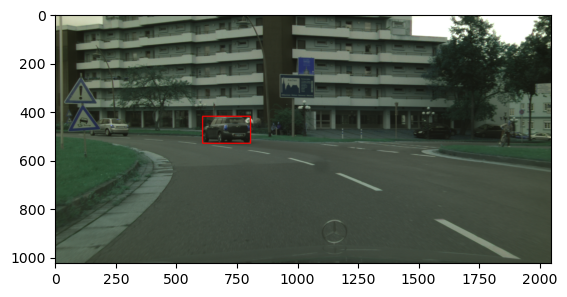

In [12]:
#cv2.imshow("Bounding box", temp_image)
plt.imshow(temp_image)

In [13]:
def showTheBBox(img_path, bbox_path):
    image = cv2.imread(img_path)
    temp_file = open(bbox_path, "r")
    temp_file_data = temp_file.read()
    temp_file.close()
    temp_json = json.loads(temp_file_data)
    #coordinates = temp_json["objects"][0]["2d"]["modal"]
    for i in range(len(temp_json["objects"])):
        coordinates = temp_json["objects"][i]["2d"]["modal"]
        x, y, w, h = coordinates
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 4)
        label_name = temp_json["objects"][i]["label"]
        cv2.putText(image, label_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    plt.figure(figsize=(10,6))
    plt.imshow(image)
    plt.plot()

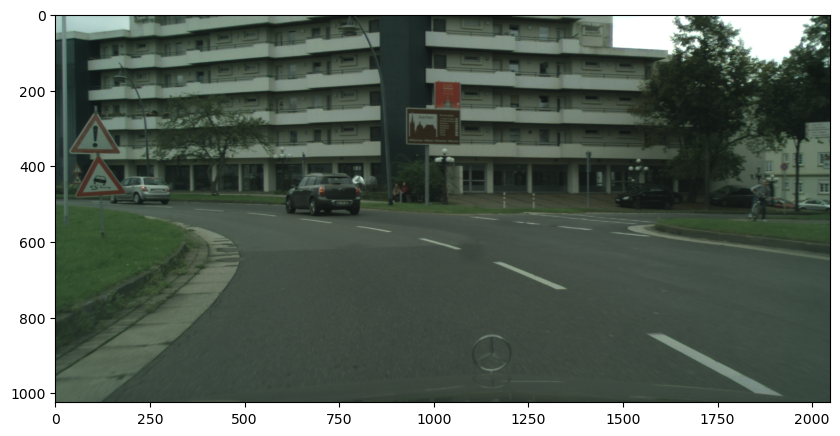

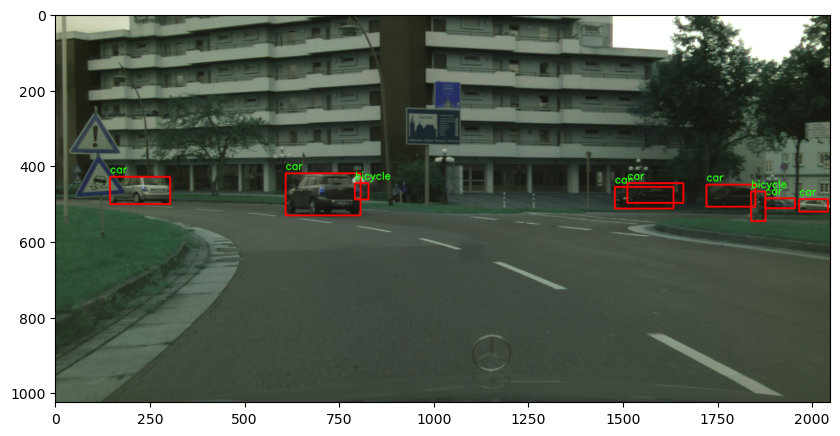

In [14]:
image = Image.open("/kaggle/input/leftimg8bit/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png")
plt.figure(figsize=(10,6))
plt.imshow(image)
plt.plot()
showTheBBox("/kaggle/input/leftimg8bit/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png", "/kaggle/input/boxlabels-cityscape/gtBbox3d/train/aachen/aachen_000000_000019_gtBbox3d.json")

In [27]:
# Car = 0
# Bicycle = 1
# Train = 2
# Bus = 3
# motorcycle = 4
# truck = 5
# trailer = 6
# tunnel = 7
# dynamic = 8

def getNumForClass(class_name):
    if class_name == "car":
        return 0
    if class_name == "bicycle":
        return 1
    if class_name == "train":
        return 2
    if class_name == "bus":
        return 3
    if class_name == "motorcycle":
        return 4
    if class_name == "truck":
        return 5
    if class_name == "trailer":
        return 6
    if class_name == "tunnel":
        return 7
    if class_name == "dynamic":
        return 8

In [28]:
dataList_train = []

In [29]:
BASE_PATH = "/kaggle/input/leftimg8bit/leftImg8bit/train/"

for typeD in os.listdir(BASE_PATH):
    #print(typeD)
    typeD = BASE_PATH + typeD
    for filename in os.listdir(typeD):
        #print(filename)
        file = os.path.join(typeD, filename)
        #print(file)
        file_json_name = file.replace("leftimg8bit", "boxlabels-cityscape")
        file_json_name = file_json_name.replace("leftImg8bit", "gtBbox3d")
        file_json_name = file_json_name.replace(".png", ".json")
        file_json = open(file_json_name, "r")
        file_json_data = file_json.read()
        file_json.close()
        json_data = json.loads(file_json_data)
        for i in range(len(json_data["objects"])):
            coordinates = json_data["objects"][i]["2d"]["modal"]
            x, y, w, h = coordinates
            coordinates = {
                "x": x,
                "y": y,
                "width": w,
                "height": h
            }
            typeObj = getNumForClass(json_data["objects"][i]["label"])
            dataList_train += [[file, coordinates, typeObj]]
        #Use String replace to change the path for labels for bounding boxes
        #dataList_train.append(str(file))

In [23]:
dataList_train[2]

['/kaggle/input/leftimg8bit/leftImg8bit/train/dusseldorf/dusseldorf_000180_000019_leftImg8bit.png',
 {'x': 1630, 'y': 378, 'width': 372, 'height': 165},
 'car']

In [30]:
df_train = pd.DataFrame(dataList_train, columns=["path", "coordinates", "class"])

In [25]:
df_train

,path,coordinates,class
0,/kaggle/input/leftimg8bit/leftImg8bit/train/du...,"{'x': 725, 'y': 390, 'width': 215, 'height': 126}",car
1,/kaggle/input/leftimg8bit/leftImg8bit/train/du...,"{'x': 1341, 'y': 364, 'width': 376, 'height': ...",car
2,/kaggle/input/leftimg8bit/leftImg8bit/train/du...,"{'x': 1630, 'y': 378, 'width': 372, 'height': ...",car
3,/kaggle/input/leftimg8bit/leftImg8bit/train/du...,"{'x': 1338, 'y': 395, 'width': 100, 'height': ...",car
4,/kaggle/input/leftimg8bit/leftImg8bit/train/du...,"{'x': 561, 'y': 435, 'width': 44, 'height': 51}",bicycle
...,...,...,...
22863,/kaggle/input/leftimg8bit/leftImg8bit/train/ul...,"{'x': 1008, 'y': 433, 'width': 70, 'height': 58}",car
22864,/kaggle/input/leftimg8bit/leftImg8bit/train/ul...,"{'x': 1057, 'y': 425, 'width': 94, 'height': 78}",car
22865,/kaggle/input/leftimg8bit/leftImg8bit/train/ul...,"{'x': 1039, 'y': 440, 'width': 39, 'height': 57}",car
22866,/kaggle/input/leftimg8bit/leftImg8bit/train/ul...,"{'x': 868, 'y': 447, 'width': 22, 'height': 27}",car


In [26]:
classes = df_train["class"].unique()
print(classes)

['car' 'bicycle' 'bus' 'motorcycle' 'truck' 'train' 'dynamic' 'trailer'
 'tunnel']


In [31]:
df_train

,path,coordinates,class
0,/kaggle/input/leftimg8bit/leftImg8bit/train/du...,"{'x': 725, 'y': 390, 'width': 215, 'height': 126}",0
1,/kaggle/input/leftimg8bit/leftImg8bit/train/du...,"{'x': 1341, 'y': 364, 'width': 376, 'height': ...",0
2,/kaggle/input/leftimg8bit/leftImg8bit/train/du...,"{'x': 1630, 'y': 378, 'width': 372, 'height': ...",0
3,/kaggle/input/leftimg8bit/leftImg8bit/train/du...,"{'x': 1338, 'y': 395, 'width': 100, 'height': ...",0
4,/kaggle/input/leftimg8bit/leftImg8bit/train/du...,"{'x': 561, 'y': 435, 'width': 44, 'height': 51}",1
...,...,...,...
22717,/kaggle/input/leftimg8bit/leftImg8bit/train/ul...,"{'x': 1008, 'y': 433, 'width': 70, 'height': 58}",0
22718,/kaggle/input/leftimg8bit/leftImg8bit/train/ul...,"{'x': 1057, 'y': 425, 'width': 94, 'height': 78}",0
22719,/kaggle/input/leftimg8bit/leftImg8bit/train/ul...,"{'x': 1039, 'y': 440, 'width': 39, 'height': 57}",0
22720,/kaggle/input/leftimg8bit/leftImg8bit/train/ul...,"{'x': 868, 'y': 447, 'width': 22, 'height': 27}",0


In [32]:
df_train.to_csv("training_data.csv")